In [1]:
DATASET_NAME = "ISBI2012_EM" # DRIVE, CVC_ClinicDB, LUNGS, ISIC2018
CFG_NAME = "Gauss_Unet"
# Import libraries

import os
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

%matplotlib inline
import numpy as np
import time
from tqdm import tqdm
from keras.callbacks import ModelCheckpoint, CSVLogger, EarlyStopping, ReduceLROnPlateau
from keras import callbacks
from keras import backend as K
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

import models as M
import losses as l

ROOT_DIR = os.path.abspath("./")
DATASET_FOLDER = "npys"
DATASET_PATH = os.path.join(ROOT_DIR, "datasets", DATASET_FOLDER)
EXPERIMENT_NAME = "{}_{}".format(DATASET_NAME, CFG_NAME)

if not os.path.exists(os.path.join(ROOT_DIR, "logs")):
    os.mkdir(os.path.join(ROOT_DIR, "logs"))

LOG_PATH = os.path.join(ROOT_DIR, "logs", EXPERIMENT_NAME)

if not os.path.exists(LOG_PATH):
    os.mkdir(LOG_PATH)
    
print(os.listdir(DATASET_PATH))

train_data = np.load("{}/{}_images.npy".format(DATASET_PATH, DATASET_NAME)) 
train_labels = np.load("{}/{}_mask.npy".format(DATASET_PATH, DATASET_NAME))
print(train_data.shape, train_labels.shape)

Using TensorFlow backend.


['CVC-ClinicDB_images.npy', 'DRIVE_mask.npy', 'ISBI2012_EM_images.npy', 'LUNGS_mask.npy', 'ISIC2018_images.npy', 'CVC-ClinicDB_mask.npy', 'LUNGS_images.npy', 'ISIC2018_mask.npy', 'DRIVE_images.npy', 'ISBI2012_EM_mask.npy']
(30, 256, 256, 1) (30, 256, 256, 1)


In [2]:
# Build model
model = M.unet(input_size = (train_data.shape[1], 
            train_data.shape[2], train_data.shape[-1]),
                skip_train=None)

model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 256, 256, 1)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 256, 256, 32) 320         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 256, 256, 32) 9248        conv2d_1[0][0]                   
__________________________________________________________________________________________________
max_pooling2d_1 (MaxPooling2D)  (None, 128, 128, 32) 0           conv2d_2[0][0]                   
____________________________________________________________________________________________

In [6]:
# unet: 7759521
# gaussunet skip nontrainable: 7759,521 (no extra learable params)
# gaussunet skip trainable: 7763841 (gauss layers as extra learnable params)

7763841

In [10]:
import kernels as Kr

In [13]:
kernel_size = 3
sigma = 10

In [14]:
w = Kr.gauss_2D(shape=(kernel_size, kernel_size),sigma=sigma)
w

array([[0.11074074, 0.11129583, 0.11074074],
       [0.11129583, 0.1118537 , 0.11129583],
       [0.11074074, 0.11129583, 0.11074074]])

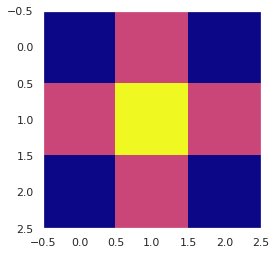

In [15]:
plt.grid(False)
plt.imshow(w, cmap='plasma')